# Identifying Fake News on Twitter - Final Model

In [74]:
from fastai.tabular import *

First, let's load the dataset.

In [75]:
from pathlib import Path
path = Path('./')

In [76]:
df = pd.read_csv(path/'tweets.csv')

In [77]:
df.describe()

,id,num_hashtags,num_likes,num_mentions,num_retweets,num_urls,user_num_favourite_tweets,user_num_followers,user_num_friends,user_num_lists,user_num_tweets
count,1.705000e+03,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1.705000e+03,1705.000000,1.705000e+03,1705.000000
mean,5.431026e+17,0.843988,126.095601,0.203519,287.282111,0.531378,2245.202346,1.668577e+06,3525.850440,1.846310e+04,57486.170674
std,1.789267e+16,0.930855,1701.099923,0.512965,1023.600350,0.516495,11002.962004,3.881032e+06,16372.334001,6.450570e+04,61227.214167
min,4.982543e+17,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000e+00,0.000000,0.000000e+00,4.000000
25%,5.250674e+17,0.000000,14.000000,0.000000,100.000000,0.000000,15.000000,1.253000e+04,296.000000,2.620000e+02,11447.000000
50%,5.443001e+17,1.000000,36.000000,0.000000,145.000000,1.000000,161.000000,1.418420e+05,570.000000,1.966000e+03,37117.000000
75%,5.528345e+17,1.000000,82.000000,0.000000,266.000000,1.000000,843.000000,8.937250e+05,1644.000000,1.336500e+04,94820.000000
max,5.815507e+17,7.000000,69825.000000,6.000000,37264.000000,2.000000,208101.000000,2.529987e+07,453460.000000,2.275623e+06,621399.000000


In [78]:
df.head()

,annotation,has_location,has_media,id,num_hashtags,num_likes,num_mentions,num_retweets,num_urls,text,user_no_profile_image,user_num_favourite_tweets,user_num_followers,user_num_friends,user_num_lists,user_num_tweets,user_protected,user_verified
0,True,False,False,553585504093224962,1,165,0,371,1,Suspected #CharlieHebdo killers are in same ji...,False,13,22719054,113,160916,37210,False,True
1,False,False,False,544277728930062336,0,56,0,251,0,SYDNEY AIRSPACE CLOSED,False,299,201996,3446,2228,21817,False,False
2,True,False,False,544519622389956609,1,110,0,107,0,thank god #SydneySiege is over. so much respe...,False,20745,224483,7810,1298,53735,False,False
3,True,False,False,580327336505176064,0,44,0,383,1,"Germanwings plane crashes in France, up to 150...",False,841,6446943,1053,91710,117720,False,True
4,False,False,True,552981833189969921,1,134,0,233,0,Nice work from Banksy #JeSuisCharlie http://t....,False,1025,119372,222,837,3795,False,False


In [79]:
df.dtypes

annotation                     bool
has_location                   bool
has_media                      bool
id                            int64
num_hashtags                  int64
num_likes                     int64
num_mentions                  int64
num_retweets                  int64
num_urls                      int64
text                         object
user_no_profile_image          bool
user_num_favourite_tweets     int64
user_num_followers            int64
user_num_friends              int64
user_num_lists                int64
user_num_tweets               int64
user_protected                 bool
user_verified                  bool
dtype: object

In [80]:
df.drop(columns=['text'], inplace=True)

In [81]:
dep_var = 'annotation'
cat_names = ['has_location', 'has_media', 'user_no_profile_image', 'user_protected', 'user_verified']
cont_names = ['num_hashtags', 'num_likes', 'num_mentions', 'num_retweets', 'num_urls', 'user_num_favourite_tweets',
              'user_num_followers', 'user_num_friends', 'user_num_lists', 'user_num_tweets']

In [82]:
valid_idx = range(len(df)-200, len(df))
procs = [FillMissing, Categorify, Normalize]

In [83]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names, cont_names=cont_names)

In [96]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


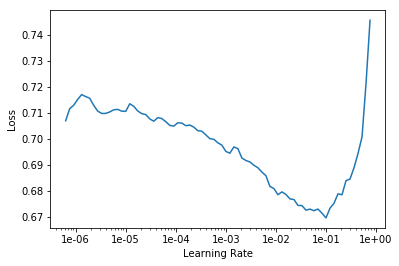

In [85]:
learn.lr_find()
learn.recorder.plot()

In [97]:
learn.fit_one_cycle(2, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.637573,0.621921,0.690000,00:00
1,0.641803,0.673786,0.575000,00:00


In [87]:
learn.save('tabular-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


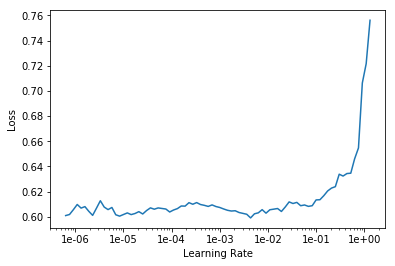

In [98]:
learn.lr_find()
learn.recorder.plot()